<center>
    <img src='images/small-uai.jpeg'style="width: 300px;">
</center>

# Laboratorio S01: Tensores y regresión lineal

## _Deep learning_
   
<center>
    <img src='images/regresion-lineal-python.png'style="width: 400px;">
    <sub><sup>https://miro.medium.com/max/1900/1*TzBsVJUXqofGqdsBJRvXEw.png</sup></sub> 
</center>

**Profesor**: Dr. Juan Bekios Calfa

**Grado**: MIA

# Laboratorio 01: Regresión Lineal y Redes Neuronales

## Objetivo:

1.   Introducción a tensores.
2.   Implementar el algoritmo de regresión lineal utilizando Python.
3.   Implementar el algoritmo de regresión lineal utilizando las librerías Torch.
4. Implementar el algoritmo de regresión lineal utilizando Torch.

## 1. Introducción a tensores

Un tensor PyTorch es básicamente lo mismo que una matriz numpy: no sabe nada sobre aprendizaje profundo o 
gráficos computacionales o gradientes, y es solo una matriz genérica n-dimensional que se utilizará para 
el cálculo numérico arbitrario.

![picture](https://empresas.blogthinkbig.com/wp-content/uploads/2020/04/tensor1.png?resize=640%2C423)


### 1.1 Crear un tensor

In [ ]:
import torch
import numpy as np

In [ ]:
# Crear un tensor vacío: No inicializado
x = torch.empty(1) # escalar
print(x)

x = torch.empty(3) # vector, 1D
print(x)

x = torch.empty(2,3) # matriz, 2D
print(x)

x = torch.empty(2,2,3) # tensor, 3 dimensions
#x = torch.empty(2,2,2,3) # tensor, 4 dimensions
print(x)

In [ ]:
# Lista python construir un tensor
list = [[1,2], [3, 4], [5, 6]]
tensor1 = torch.tensor(list)

print(tensor1)
print(tensor1.shape)

# Crear un tensor de una lista
tensor2 = torch.tensor([[1,2], [3, 4], [5, 6]])
print(tensor2)

# Crear un tensor a partir de una matriz numpy
imagen = np.array([1,2,3,4])
tensor3 = torch.tensor(imagen)
#print(tensor3)
#print(tensor3.shape)

# Torch tensor de números aleatorios
tensor4 = torch.rand(2,3)
#print(tensor4)
#print(tensor4.shape)

### 1.2 Estructura de un tensor

El método *size()* permite ver el tamaño de un tensor, su rango y las dimensiones.

In [ ]:
print(tensor1.size())

### 1.3 Acceso a un tensor

Los elementos de un tensor pueden ser accesados de la misma manera que en **numpy** (librerías de matrices de Python).

In [ ]:
print(tensor1)
print(tensor1[1]) # Obtengo la fila dos de el tensor (completa)
print(tensor1[1,1]) # Obtengo el elemento de la posición de la fila 2 y columna 2

### 1.4 Uso de tensores con CUDA (GPU)

Pytorch permite trabajar con CUDA para realizar operaciones matemáticas en GPU (Si se cuenta con una).

In [42]:
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

True
0
GeForce GTX 1660 SUPER


### 1.5 CPU vs GPU

In [44]:
%%time
# Tiempo CPU
for i in range(500):
  x = torch.randn(1000, 1000)
  y = torch.randn(1000, 1000)
  z = torch.matmul(x, y)


CPU times: user 58.3 s, sys: 136 ms, total: 58.4 s
Wall time: 14.2 s


In [46]:
%%time
# Tiempo GPU
cuda0 = torch.device('cuda:0')
for i in range(500):
  x = torch.randn(1000, 1000, device=cuda0)
  y = torch.randn(1000, 1000, device=cuda0)
  z = torch.matmul(x, y)

A = torch.tensor([[1,2], [3, 4], [5, 6]], device=cuda0)
print(A)

tensor([[1, 2],
        [3, 4],
        [5, 6]], device='cuda:0')
CPU times: user 340 ms, sys: 114 ms, total: 454 ms
Wall time: 457 ms


## 2. Regresión lineal (I):

Se realiza el cálculo de una regresión lineal por medio del cálculo manual de los gradientes (derivada de la función de pérdida).

Como ejemplo utilizaremos base de datos muy simple. La hipótesis será lineal:

$$y = \theta_0 \cdot x$$

Sin intercepto o _bias_ para simplificar el problema y explicarlo con claridad.


### Base de datos

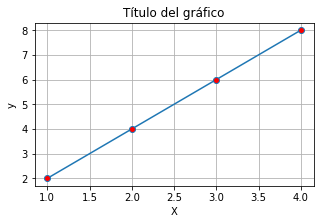

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))

X = np.array([1, 2, 3, 4], dtype=np.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)

plt.plot(X, y, marker='o', markerfacecolor='red')
plt.title('Título del gráfico')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)

### 2.1 Regresión lineal utilizando descenso de gradiente

Para calcular una regresión lineal utilizando **descenso de gradiente** debemos contar con los siguientes constructos:



*  **Hipótesis:** Función de lineal, para el ejemplo nuestra hipótesis será: $$\hat{y}=\theta_0 \cdot x$$ Es la fución que hace la predicción una vez que fueron aprendidos los parámetros, también se denota como: $$\hat{y}=h_\theta(x)$$


*  **Función de pérdida**: Error cuadrático medio (MSE, _mean squared error_), $$l(y,\hat{y})=\frac{1}{N}\cdot (y -\hat{y})^2$$

*  **Derivada de la función de pérdida**: $$\frac{dl}{d\theta_0} = \frac{1}{N}\cdot 2x(\theta_0 x - y)$$

In [50]:
import numpy as np

X = np.array([1, 2, 3, 4], dtype=np.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)

# Inicializo con cualquier valor los tetas (W)
W = 0.0

# Hipótesis: Lineal (f(x)=w*x)
def forward(x):
  return W * x

# Loss: MSE
def loss(y, y_pred):
  return ((y - y_pred)**2).mean()

# Gradiente
# L = MSE = 1/N * (w*x - y) ** 2
# dL/dW = 1/N * 2x(w*x -y)
def gradient(x, y, y_pred):
  return np.dot(2*x, y_pred - y).mean()

print(f'Predicción antes de entrenar: f(5) = {forward(5):.3f}')

Predicción antes de entrenar: f(5) = 0.000


In [51]:
# Entrenar nuestro modelo: Descenso de gradiente.
learning_rate = 0.01
n_iter = 20

for epoch in range(n_iter):
  # Prediccion
  y_pred = forward(X)

  # Error
  l = loss(y, y_pred)

  # Calculo de gradientes 
  dw = gradient(X, y, y_pred)

  # Actualizar los pesos
  W = W - learning_rate * dw

  if epoch % 2 == 0:
    print(f'epoch {epoch+1}: w = {W:.3f}, loss = {l:.8f}')

print(f'Predicción después de entrenar: f(5) = {forward(5):.3f}')

epoch 1: w = 1.200, loss = 30.00000000
epoch 3: w = 1.872, loss = 0.76800019
epoch 5: w = 1.980, loss = 0.01966083
epoch 7: w = 1.997, loss = 0.00050332
epoch 9: w = 1.999, loss = 0.00001288
epoch 11: w = 2.000, loss = 0.00000033
epoch 13: w = 2.000, loss = 0.00000001
epoch 15: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
Predicción después de entrenar: f(5) = 10.000


### 2.2 Regresión lineal (II):

En este caso se realiza el cálculo de los parámetros de la regresión lineal por medio del cálculo manual de los gradientes (derivada de la función de pérdida).

In [52]:
import torch

# Pasar todos los vectores a tensores
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# Salida modelo (prediccion del modelo)
def forward(x):
  return x * w
  
# loss = MSE
def loss(y, y_pred):
  return ((y_pred - y)**2).mean()

print(f'Prediccion antes del entrenamiento: f(5) = {forward(5).item():.3f}')

Prediccion antes del entrenamiento: f(5) = 0.000


In [55]:
# Fase: Entrenamiento
learning_rate = 0.02
n_iter = 50

for epoch in range(n_iter):
  # 1. Prediccion
  y_pred = forward(X)

  # 2. Calcular error
  l = loss(y, y_pred)

  # 3. Calcular los gradientes
  l.backward()

  # 4. Actualizar los pesos
  with torch.no_grad():
    w -= learning_rate * w.grad

  # 5. Dejar en zero los valores de gradiente de w
  w.grad.zero_()

  if epoch % 3 == 0:
    print(f'epoch {epoch}: w = {w.item():.3f}, loss = {l.item():.8f}')

print(f'Predicción después de entrenar: f(5) = {forward(5).item():.3f}')


epoch 0: w = 2.000, loss = 0.00000000
epoch 3: w = 2.000, loss = 0.00000000
epoch 6: w = 2.000, loss = 0.00000000
epoch 9: w = 2.000, loss = 0.00000000
epoch 12: w = 2.000, loss = 0.00000000
epoch 15: w = 2.000, loss = 0.00000000
epoch 18: w = 2.000, loss = 0.00000000
epoch 21: w = 2.000, loss = 0.00000000
epoch 24: w = 2.000, loss = 0.00000000
epoch 27: w = 2.000, loss = 0.00000000
epoch 30: w = 2.000, loss = 0.00000000
epoch 33: w = 2.000, loss = 0.00000000
epoch 36: w = 2.000, loss = 0.00000000
epoch 39: w = 2.000, loss = 0.00000000
epoch 42: w = 2.000, loss = 0.00000000
epoch 45: w = 2.000, loss = 0.00000000
epoch 48: w = 2.000, loss = 0.00000000
Predicción después de entrenar: f(5) = 10.000


### 2.3. Regresión lineal (III):

Cálculo de los parámetros de la regresión lineal utilizando Pytorch (derivada de la función de pérdida).

In [58]:
import torch # Librerias base
import torch.nn as nn # Construir los modelos
import numpy as np    
import matplotlib.pyplot as plt

In [59]:
def gradiente_descent(X, y, iters=10):
  n_samples, n_features = X.shape

  # 1.1) Defino la hipotesis
  input_size = n_features
  output_size = 1
  model = nn.Linear(input_size, output_size, bias=False)

  # 1.2) Funcion de perdida y configurar los parametros del optimizador
  learning_rate = 0.01
  criterion = nn.MSELoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  # 1.3) Ciclo de entrenamiento
  num_epochs = iters
  for epoch in range(num_epochs):
    # Calcular la prediccion
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # Actualiza el modelo
    loss.backward() #Calcular los gradientes
    optimizer.step()

    # Dejar los gradientes en cero
    optimizer.zero_grad()

    if epoch % 2 == 0:
      print(f'epoch {epoch}:  loss = {loss.item():.8f}') 
    
  return model  

In [60]:
def plot_fit(X_numpy, y_numpy, y_pred):
  plt.plot(X_numpy, y_numpy, 'ro', label='$Y_{real}$')
  plt.plot(X_numpy, y_pred, 'bo', label='$Y_{estimado}$')
  plt.xlabel('X - Variable Independiente')
  plt.ylabel('Y - Variable Dependiente')
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  plt.show()


## 3. Visualización del descenso de gradiente

epoch 0:  loss = 6217.76318359


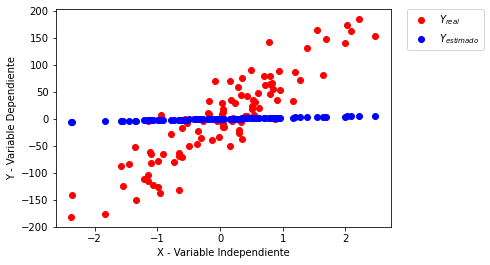

In [64]:
from sklearn import datasets
#import matplotlib.pyplot as plt

# 0) Cargar datos
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=40, random_state=4)

# cast a Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)

# 1) Entrenamiento
model = gradiente_descent(X, y, iters=1)

# 2) Graficar
predicted = model(X).detach().numpy()

plot_fit(X_numpy, y_numpy, predicted)

epoch 0:  loss = 6238.56005859
epoch 2:  loss = 5864.39550781
epoch 4:  loss = 5517.80517578


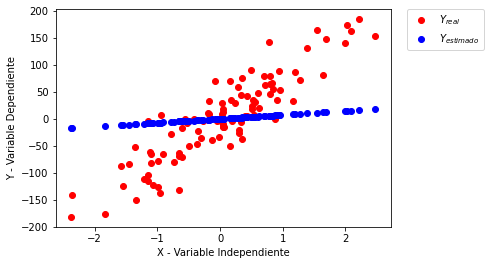

In [65]:
# 1) Entrenamiento
model = gradiente_descent(X, y, iters=5)

# 2) Graficar
predicted = model(X).detach().numpy()

plot_fit(X_numpy, y_numpy, predicted)

epoch 0:  loss = 6209.78515625
epoch 2:  loss = 5837.74121094
epoch 4:  loss = 5493.11523438
epoch 6:  loss = 5173.88525391
epoch 8:  loss = 4878.18212891
epoch 10:  loss = 4604.27148438
epoch 12:  loss = 4350.54541016
epoch 14:  loss = 4115.51855469
epoch 16:  loss = 3897.81274414
epoch 18:  loss = 3696.14990234


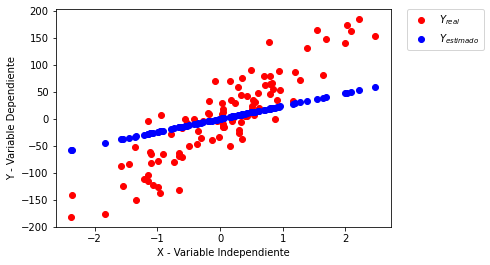

In [66]:
# 1) Entrenamiento
model = gradiente_descent(X, y, iters=20)

# 2) Graficar
predicted = model(X).detach().numpy()

plot_fit(X_numpy, y_numpy, predicted)

epoch 0:  loss = 6399.86376953
epoch 2:  loss = 6013.81103516
epoch 4:  loss = 5656.20947266
epoch 6:  loss = 5324.96044922
epoch 8:  loss = 5018.12353516
epoch 10:  loss = 4733.89990234
epoch 12:  loss = 4470.62158203
epoch 14:  loss = 4226.74560547
epoch 16:  loss = 4000.84228516
epoch 18:  loss = 3791.58691406
epoch 20:  loss = 3597.75292969
epoch 22:  loss = 3418.20312500
epoch 24:  loss = 3251.88598633
epoch 26:  loss = 3097.82519531
epoch 28:  loss = 2955.11865234
epoch 30:  loss = 2822.92846680
epoch 32:  loss = 2700.48022461
epoch 34:  loss = 2587.05615234
epoch 36:  loss = 2481.99072266
epoch 38:  loss = 2384.66772461
epoch 40:  loss = 2294.51757812
epoch 42:  loss = 2211.01098633
epoch 44:  loss = 2133.65820312
epoch 46:  loss = 2062.00634766
epoch 48:  loss = 1995.63452148
epoch 50:  loss = 1934.15417480
epoch 52:  loss = 1877.20471191
epoch 54:  loss = 1824.45190430
epoch 56:  loss = 1775.58666992
epoch 58:  loss = 1730.32324219
epoch 60:  loss = 1688.39465332
epoch 62:  lo

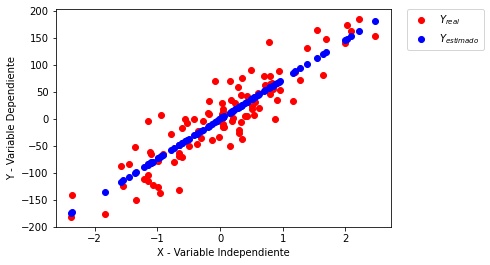

In [67]:
# 1) Entrenamiento
model = gradiente_descent(X, y, iters=300)

# 2) Graficar
predicted = model(X).detach().numpy()

plot_fit(X_numpy, y_numpy, predicted)